In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-06 ...  9.990e-04  1.000e-03]
        y: [[ 0.000e+00  5.609e+04 ... -4.508e-07 -4.178e-07]
            [ 0.000e+00  2.883e-02 ...  2.000e+00  2.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 746
     njev: 0
      nlu: 0
[ 5.60380327e+10  5.20489533e+10  4.38385968e+10  3.53218867e+10
  2.68047408e+10  1.85181341e+10  1.06508636e+10  3.37995458e+09
 -3.15995779e+09 -8.87701147e+09 -1.36855430e+10 -1.75307052e+10
 -2.04382740e+10 -2.24552766e+10 -2.36373253e+10 -2.40248893e+10
 -2.36595021e+10 -2.26417974e+10 -2.11068045e+10 -1.91876141e+10
 -1.69712720e+10 -1.45162582e+10 -1.19127489e+10 -9.26195269e+09
 -6.65986759e+09 -4.18585188e+09 -1.87617140e+09  2.28494837e+08
  2.08323940e+09  3.67078900e+09  4.97486746e+09  5.99277117e+09
  6.72827542e+09  7.18134790e+09  7.37155303e+09  7.33476645e+09
  7.10664979e+09  6.71358177e+0

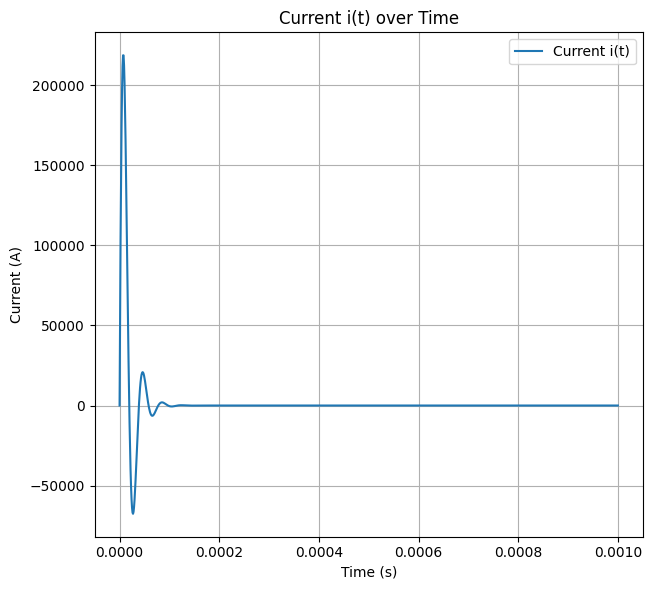

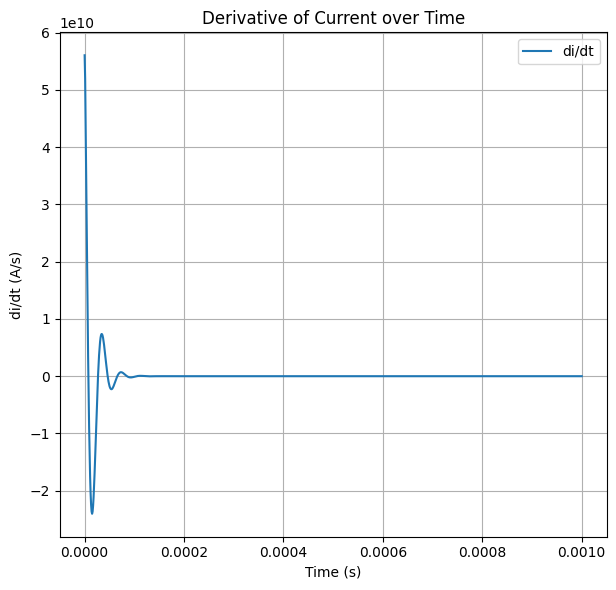

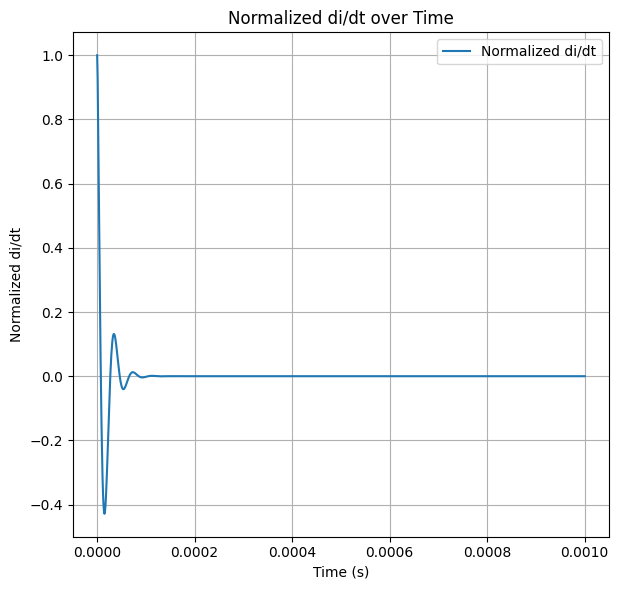

'./normalized_di_dt.txt'

In [5]:

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
mu_r = 1  # relative permeability (for air or vacuum)

V = 400  # voltage in volts
C = 5e-3  # capacitance in farads(F)

coil_inner_diameter_mm = 5  # inner diameter of the coil in cm
R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.6437  # diameter of 22 AWG wire in mm
wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters
rho_copper = 1.68e-8  # resistivity of copper in ohm-meters

# Calculating Inductance L and Resistance R
length_wire = 2 * np.pi * R_coil  # length of the wire in meters
cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2
L = mu_0 * mu_r * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries

R = rho_copper * length_wire / cross_sectional_area  # Resistance in Ohms
# R = 0.0081

# Differential equation for the RLC circuit
def rlc_circuit(t, I, L, R, V, C):
    i, q = I  # i(t) and q(t) are the current and charge on the capacitor respectively
    di_dt = (V - R*i - q/C) / L
    dq_dt = i
    return [di_dt, dq_dt]


# def rlc_circuit(t, I, L, R, V,C):
#     i, di_dt = I
#     d2i_dt2 = (V - R*di_dt - i/L) / C
#     return [di_dt, d2i_dt2]

# Initial conditions
initial_conditions = [0, 0]  # i(0) = 0 A, q(0) = 0 C (uncharged capacitor)

# Time span for the solution in seconds
t_span = (0, 0.001)
t_eval = np.linspace(*t_span, 1000)  # 200 Samples collected till eval from 0 to 0.01 s 

# Solve the differential equation
sol = solve_ivp(rlc_circuit, t_span, initial_conditions, args=(L, R, V, C), t_eval=t_eval, method='RK45')

# Compute di/dt and the normalized di/dt
di_dt = np.gradient(sol.y[0], sol.t)

di_dt_max = np.max(np.abs(di_dt))

print(sol)

print(di_dt)

print("di_dt_max  :" )

print(di_dt_max)

normalized_di_dt = di_dt / di_dt_max


print(normalized_di_dt)

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)

# Plotting the current i(t), its derivative di/dt, and normalized di/dt
plt.figure(figsize=(18, 6))

# Current i(t)
plt.subplot(1, 3, 1)
plt.plot(sol.t, sol.y[0], label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Derivative of current di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
plt.plot(sol.t, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Normalized derivative of current normalized di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
plt.plot(sol.t, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath


# %%


METHOD 2 

6.688249719527975e-09
0.0008101539292465569
-26235013943.81421
-26235013943.81421
i_t:: [ 0.00000000e+00  5.60980827e+04  1.04211340e+05  1.43897290e+05
  1.75001185e+05  1.97627513e+05  2.12107448e+05  2.18963650e+05
  2.18873684e+05  2.12633263e+05  2.01120354e+05  1.85261080e+05
  1.65998146e+05  1.44262417e+05  1.20948065e+05  9.68915896e+04
  7.28548623e+04  4.95121996e+04  2.74413823e+04  7.11841550e+03
 -1.10842477e+04 -2.68963658e+04 -4.01458434e+04 -5.07523685e+04
 -5.87191922e+04 -6.41234949e+04 -6.71057723e+04 -6.78586509e+04
 -6.66155129e+04 -6.36392734e+04 -5.92116078e+04 -5.36228811e+04
 -4.71629824e+04 -4.01132198e+04 -3.27393822e+04 -2.52860300e+04
 -1.79720356e+04 -1.09873558e+04 -4.49098716e+03  1.38997439e+03
  6.56026795e+03  1.09555139e+04  1.45404996e+04  1.73068403e+04
  1.92701511e+04  2.04668676e+04  2.09508421e+04  2.07898398e+04
  2.00620419e+04  1.88526562e+04  1.72507159e+04  1.53461373e+04
  1.32270873e+04  1.09777021e+04  8.67617896e+03  6.39325350e+03
  

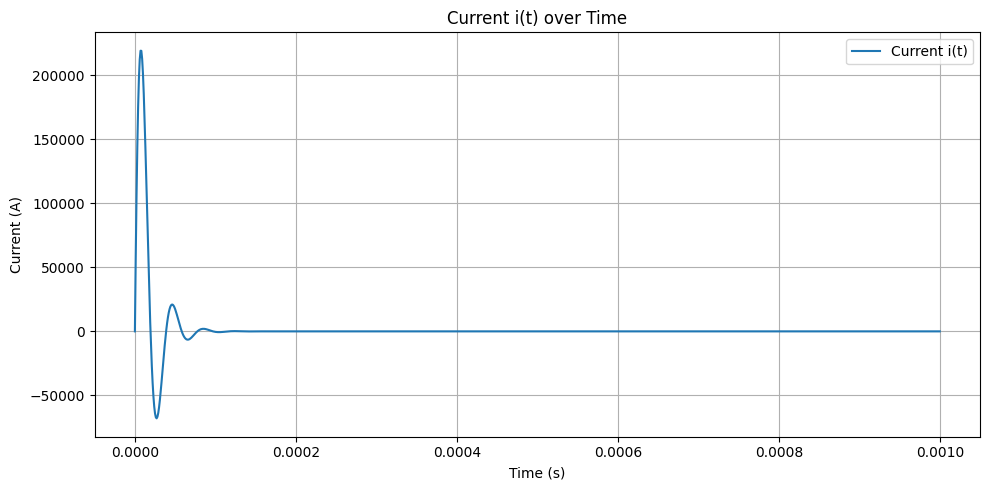

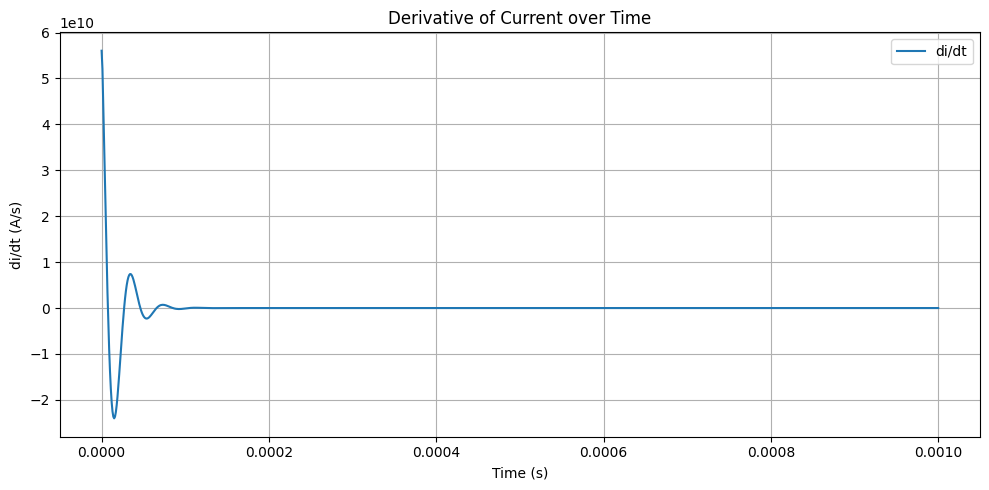

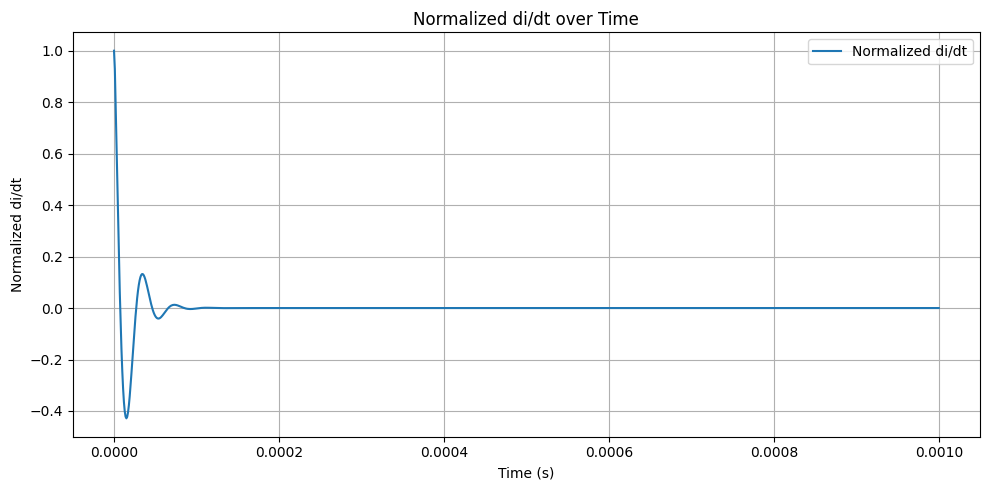

'./normalized_di_dt.txt'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
V0 = 400  # initial voltage in volts (used as a constant factor for the current)
C = 5e-3  # capacitance in farads(F)



# Parameters for the coil, assuming a simple circular loop
coil_inner_diameter_mm = 5  # inner diameter of the coil in cm

R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.644  # diameter of 22 AWG wire in mm

wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters


rho_copper = 1.68e-8  # resistivity of copper in ohm-meters



# Calculating Inductance L and Resistance R

length_wire = 2 * np.pi * R_coil  # length of the wire in meters

cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2

L = mu_0 * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries

R = rho_copper * length_wire / cross_sectional_area     # Resistance in Ohms

# R = 0.0000089

# R = 0.000089

print(L)
print(R)





# Time span for the solution in seconds
t_span = np.linspace(0, 0.001, 1000)



# # Calculate angular frequencies for the underdamped case
# omega_1 = R / (2 * L)
# omega_d = np.sqrt(1 / (L * C) - omega_1**2)

# # For discriminant > 0, use the overdamped equation; otherwise, use underdamped
# discriminant = omega_1**2 - 1 / (L * C)



# if discriminant > 0:
#     # Overdamped response (not likely the case we want)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cosh(omega_d * t_span) + (omega_1 / omega_d) * np.sinh(omega_d * t_span))
# else:
    
#     # Underdamped response (likely the case we want based on the plot)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cos(omega_d * t_span) + (omega_1 / omega_d) * np.sin(omega_d * t_span))





# Calculate ω1 and ω2 for the overdamped case
omega_1 = R / (2 * L)
omega_2 = np.sqrt(np.abs((R / (2 * L))**2 - 1 / (L * C)))

# Calculate i(t) for overdamped or underdamped case based on the discriminant
discriminant = (R / (2 * L))**2 - 1 / (L * C)
print(discriminant)

# For discriminant > 0, use the overdamped equation; otherwise, use underdamped
if discriminant > 0:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) - 1) * np.sinh(omega_2 * t_span)
else:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) + 1) * np.sin(omega_2 * t_span)








print(discriminant)

print(f"i_t:: {i_t}")
# Compute di/dt
di_dt = np.gradient(i_t, t_span)

# Normalize di/dt
di_dt_max = np.max(np.abs(di_dt))

print(di_dt_max)


normalized_di_dt = di_dt / di_dt_max

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)



# Plotting the current i(t)
plt.figure(figsize=(10, 5))
plt.plot(t_span, i_t, label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Derivative of current di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Normalized derivative of current normalized di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath


PART B ELECTRIC FIELD 

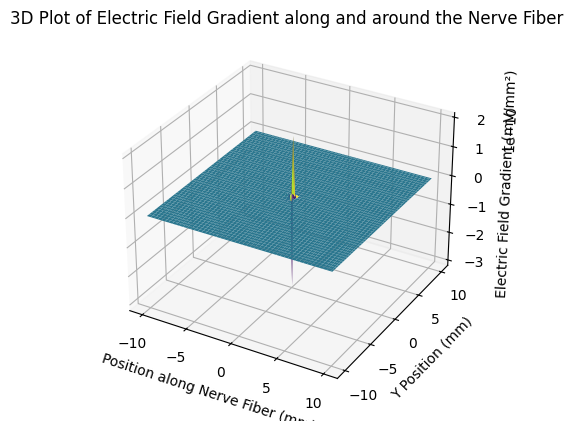

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns in the coil

# Constants
R_coil = 0.0025          # Radius of the coil in meters (2.5 mm)
z = 0.005                # Distance from coil to nerve in meters (5 mm)
y_offset = 0.004         # Offset in y-direction in meters (4 mm)



# Coil definition
coil_radius = 0.05*1e-3  # Radius in meters

num_points = 100  # Number of points discretizing the coil

theta = np.linspace(0, 2 * np.pi, num_points)
coil_x = coil_radius * np.cos(theta)
coil_y = coil_radius * np.sin(theta)

dl = 2 * np.pi * coil_radius / num_points  # Length of each coil segment




#####


dt = 0.01  # time step in seconds
# Maximum rate of change of current obtained from your calculations
max_di_dt = 1000000  # Example value in A/s, replace with your actual value





# Position grids in the XY plane
x_range = np.linspace(-0.01, 0.01, 100)  # X positions in meters
y_range = np.linspace(-0.01, 0.01, 100)  # Y positions in meters

# Create mesh grids for X and Y positions
X, Y = np.meshgrid(x_range, y_range)



#####


# Initialize electric field gradient array
dEx_dx = np.zeros_like(X)

# Compute the electric field gradient at each node and y-position
for k in range(num_points):
    
    # Distance from each coil segment to each node, for all y-positions
    r = np.sqrt((X - coil_x[k])**2 + (Y - coil_y[k])**2)
    # Contributions from each segment to the electric field
    dEx = -mu_0 * N * di_dt_max * (X - coil_x[k]) / (4 * np.pi * r**3) * dl
    # Approximate the derivative by finite difference
    if k > 0:
        dEx_dx += (dEx - prev_dEx) / dl
    prev_dEx = dEx



# Convert electric field gradient from V/m^2 to mV/mm^2
dEx_dx_mVmm2 = dEx_dx * 1e6

# Plotting the 3D gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X * 1e3, Y * 1e3, dEx_dx_mVmm2, cmap='viridis')

ax.set_xlabel('Position along Nerve Fiber (mm)')
ax.set_ylabel('Y Position (mm)')
ax.set_zlabel('Electric Field Gradient (mV/mm²)')
ax.set_title('3D Plot of Electric Field Gradient along and around the Nerve Fiber')

plt.show()




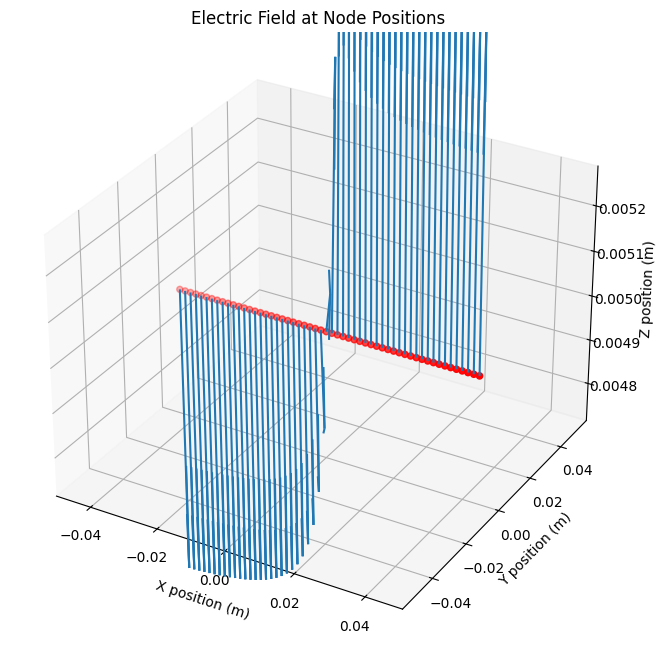

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters

# Define the di/dt value here based on results from Part A


di_dt = np.max(di_dt)  # Maximum derivative of the current, example value
        

# Define the number of nodes and their positions along the nerve
num_nodes = 55
distance_between_nodes_mm = 1.6
node_positions_mm = np.linspace(-num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes)
node_positions = node_positions_mm / 1000  # Convert from mm to m

# Coil discretization
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta)

# Function to calculate vector potential at a point
def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt):
    A = np.zeros(3)
    for i in range(len(coil_x)):
        dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        r_vec = point - np.array([coil_x[i], coil_y[i] + y_offset, 0])
        distance = np.linalg.norm(r_vec)
        A += mu_0 * N * di_dt / (4 * np.pi * distance) * dl_vec
    return A

# Compute the electric field at each node
E_nodes = np.zeros((len(node_positions), 3))
for i, x_pos in enumerate(node_positions):
    point = np.array([x_pos, 0, z])  # Point at which we're calculating A
    A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt)
    E_nodes[i] = -np.gradient(A, axis=0)  # Electric field is negative gradient of A
    
    
    
    
    

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the nodes as points
ax.scatter(node_positions, np.zeros_like(node_positions), z * np.ones_like(node_positions), color='r')

# Plot the electric field as vectors
ax.quiver(node_positions, np.zeros_like(node_positions), z * np.ones_like(node_positions),
          E_nodes[:, 0], E_nodes[:, 1], E_nodes[:, 2], length=1e-3, normalize=True)

ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')
ax.set_title('Electric Field at Node Positions')

plt.show()


[-0.044      -0.04237037 -0.04074074 -0.03911111 -0.03748148 -0.03585185
 -0.03422222 -0.03259259 -0.03096296 -0.02933333 -0.0277037  -0.02607407
 -0.02444444 -0.02281481 -0.02118519 -0.01955556 -0.01792593 -0.0162963
 -0.01466667 -0.01303704 -0.01140741 -0.00977778 -0.00814815 -0.00651852
 -0.00488889 -0.00325926 -0.00162963  0.          0.00162963  0.00325926
  0.00488889  0.00651852  0.00814815  0.00977778  0.01140741  0.01303704
  0.01466667  0.0162963   0.01792593  0.01955556  0.02118519  0.02281481
  0.02444444  0.02607407  0.0277037   0.02933333  0.03096296  0.03259259
  0.03422222  0.03585185  0.03748148  0.03911111  0.04074074  0.04237037
  0.044     ]
[ 299.38903881 -128.56970588    0.        ]
[ 310.83102706 -127.39336432    0.        ]
[ 322.54650305 -125.78262506    0.        ]
[ 334.51280387 -123.7026284     0.        ]
[ 346.70268565 -121.11827673    0.        ]
[ 359.0840162  -117.99467056    0.        ]
[ 371.61950834 -114.29761546    0.        ]
[ 384.2665089  -109.99

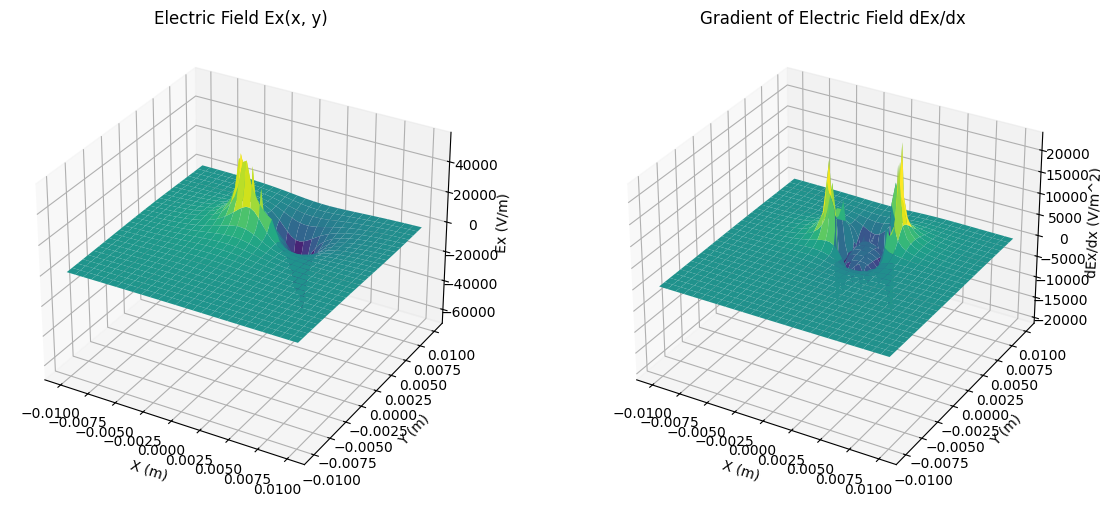

[[ 4.27958745e+02  4.38224391e+02  4.48329128e+02 ...  6.26802570e+00
  -4.84371997e+00 -1.52358083e+01]
 [ 4.46310397e+02  4.57571669e+02  4.68696201e+02 ...  1.26373880e+00
  -1.02785146e+01 -2.10346077e+01]
 [ 4.65500341e+02  4.77852634e+02  4.90099137e+02 ... -4.44517160e+00
  -1.64172880e+01 -2.75311562e+01]
 ...
 [ 2.43793464e+02  2.43574535e+02  2.41304478e+02 ... -1.51371277e+03
  -1.42290234e+03 -1.33932688e+03]
 [ 2.01408940e+02  1.97742162e+02  1.91764532e+02 ... -1.47217167e+03
  -1.38713847e+03 -1.30849897e+03]
 [ 1.61874882e+02  1.55250819e+02  1.46141446e+02 ... -1.42892176e+03
  -1.34960005e+03 -1.27588271e+03]]


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters

# Define the di/dt value here based on results from Part A for max di/dt
di_dt_max = np.max(di_dt)  # Placeholder value for the maximum di/dt (A/s)






# Coil discretization
num_points = 55
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta)




# Define the XY grid for the electric field calculation
grid_size = 55
x_range = np.linspace(-0.01, 0.01, grid_size)
y_range = np.linspace(-0.01, 0.01, grid_size)
X, Y = np.meshgrid(x_range, y_range)



# Define the number of nodes and their positions along the nerve
num_nodes = 55
distance_between_nodes_mm = 1.6
node_positions_mm = np.linspace(-num_nodes / 2 * distance_between_nodes_mm,
                                
                                num_nodes / 2 * distance_between_nodes_mm,
                                
                                num_nodes)
node_positions = node_positions_mm / 1000  # Convert from mm to m

print(node_positions)


# Function to calculate magnetic vector potential A at a point
def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max):
    A = np.zeros(3)
    for i in range(len(coil_x)):
        
        dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        
        r_vec = point - np.array([coil_x[i], coil_y[i] + y_offset, 0])
        
        distance = np.linalg.norm(r_vec)
        
        A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec
        
    return A


# # Function to calculate magnetic vector potential A at a point
# def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max):
#     A = np.zeros(3)
#     for i in range(len(coil_x)):
        
#         dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
        
#         r_vec = np.array([point, y_offset, z]) - np.array([coil_x[i], coil_y[i], 0])
        
#         distance = np.linalg.norm(r_vec)
        
#         A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec
        
#     return A



# Compute the electric field at each point on the grid
E_field = np.zeros((grid_size, grid_size, 3))

for i in range(grid_size):
    for j in range(grid_size):
        
        point = np.array([X[i, j], Y[i, j], 0])   # XY plane through the nerve center
       
        # point = node_positions[i]
        A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max)
       
        print(A)
        
        E_field[i, j] = -np.gradient(A, axis=0)  # Electric field is negative gradient of A





# # Compute the electric field at each point on the grid
# E_field = np.zeros((grid_size, grid_size, 3))

# for i in range(grid_size):
#     for j in range(grid_size):
        
#         point = node_positions[i]  # XY plane through the nerve center
       
#         A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max)
       
#         E_field[i, j] = -np.gradient(A, axis=0)  # Electric field is negative gradient of A





# Extract Ex component and calculate its spatial gradient dEx/dx
E_x = E_field[:, :, 0]



dEx_dx = np.gradient(E_x, axis=1)  # Gradient along x-axis









# Plot Ex field in 3D
fig = plt.figure(figsize=(14, 6))

# Plot Ex(x, y)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, E_x, cmap='viridis')
ax1.set_title('Electric Field Ex(x, y)')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Ex (V/m)')

# Plot dEx/dx in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, dEx_dx, cmap='viridis')
ax2.set_title('Gradient of Electric Field dEx/dx')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('dEx/dx (V/m^2)')

plt.show()

print(E_x)


In [ ]:
####    can change

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters




# Define the di/dt value here based on results from Part A for max di/dt
di_dt_max = np.max(di_dt)  # Placeholder value for the maximum di/dt (A/s)



# Coil discretization
num_points = 55
theta = np.linspace(0, 2 * np.pi, num_points)

dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment

coil_x = R_coil * np.cos(theta)
coil_y = R_coil * np.sin(theta)




# Define the XY grid for the electric field calculation
grid_size = 55
x_range = np.linspace(-0.01, 0.01, grid_size)
y_range = np.linspace(-0.01, 0.01, grid_size)
X, Y = np.meshgrid(x_range, y_range)






# Define the number of nodes and their positions along the nerve
num_nodes = 55
distance_between_nodes_mm = 1.6
node_positions_mm = np.linspace(-num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes / 2 * distance_between_nodes_mm,
                                num_nodes)
node_positions = node_positions_mm / 1000  # Convert from mm to m





# # Function to calculate magnetic vector potential A at a point
# def calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max):
#     A = np.zeros(3)
    
#     for i in range(len(coil_x)):
    
#         dl_vec = np.array([-dl * np.sin(theta[i]), dl * np.cos(theta[i]), 0])
    
#         r_vec = point - np.array([coil_x[i], coil_y[i] + y_offset, 0])
    
#         distance = np.linalg.norm(r_vec)
    
#         A += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec
    
    
#     return A




# A_nodes = np.zeros((num_nodes, num_points, 3)) 
A_nodes = np.zeros((len(node_positions), len(coil_x), 3))

def calculate_vector_potential(node_positions, coil_x, coil_y, dl, di_dt_max, y_offset, z):
    
    # A_nodes = np.zeros((len(node_positions), len(coil_x), 3))
    
    for i, x in enumerate(node_positions):
        for j, angle in enumerate(theta):
            
            dl_vec = np.array([-dl * np.sin(angle), dl * np.cos(angle), 0])
            
            r_vec = np.array([x - coil_x[j], y_offset - coil_y[j], z])
            
            distance = np.linalg.norm(r_vec)
            A_nodes[i, j] = mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec
            
    return np.sum(A_nodes, axis=1) 



A_nodes = calculate_vector_potential(node_positions, coil_x, coil_y, dl, di_dt_max, y_offset, z)

# Compute the electric field at each node position (negative gradient of vector potential)
E_nodes = -np.gradient(A_nodes, axis=0)

# Extract Ex component and calculate its spatial gradient dEx/dx
E_x = E_nodes[:, 0]  # Assuming Ex is the first component

dEx_dx = np.gradient(E_x, node_positions)  # Gradient along x-axis





# # Compute the electric field at each node position
# E_nodes = np.zeros((len(node_positions), 3))

# for i, x_pos in enumerate(node_positions):
    
#     point = np.array([x_pos, y_offset, z])  # Point at which we're calculating A
    
#     A = calculate_vector_potential(point, coil_x, coil_y, dl, di_dt_max)
    
#     E_nodes[i] = -np.gradient(A, axis=0)  # Electric field is negative gradient of A







# Extract Ex component and calculate its spatial gradient dEx/dx

# E_x = E_field[:, :, 0]

# dEx_dx = np.gradient(E_x, axis=1)  # Gradient along x-axis



# Plot Ex field in 3D
fig = plt.figure(figsize=(14, 6))

# Plot Ex(x, y)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, E_x, cmap='viridis')
ax1.set_title('Electric Field Ex(x, y)')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Ex (V/m)')

# Plot dEx/dx in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, dEx_dx, cmap='viridis')
ax2.set_title('Gradient of Electric Field dEx/dx')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_zlabel('dEx/dx (V/m^2)')

plt.show()






# # Plot the 3D surface plot of E_x
# fig = plt.figure(figsize=(14, 6))

# # Plot E_x(x, y)
# ax1 = fig.add_subplot(121, projection='3d')
# surf1 = ax1.plot_surface(X * 1e3, Y * 1e3, E_nodes * 1e3, cmap='viridis')
# ax1.set_title('Electric Field E_x(x, y)')
# ax1.set_xlabel('X (mm)')
# ax1.set_ylabel('Y (mm)')
# ax1.set_zlabel('E_x (mV/m)')
# fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# # Plot dEx/dx
# ax2 = fig.add_subplot(122, projection='3d')
# surf2 = ax2.plot_surface(X * 1e3, Y * 1e3, dEx_dx * 1e6, cmap='viridis')
# ax2.set_title('Gradient of Electric Field dE_x/dx')
# ax2.set_xlabel('X (mm)')
# ax2.set_ylabel('Y (mm)')
# ax2.set_zlabel('dE_x/dx (mV/mm^2)')
# fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# plt.show()



NameError: name 'di_dt' is not defined

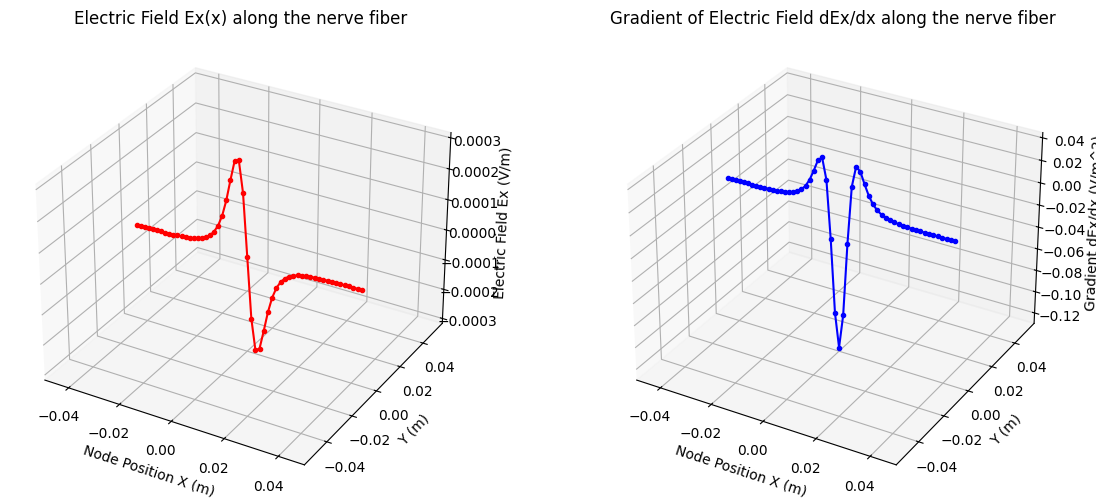

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Constants
# mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (H/m)
# N = 1  # Number of turns in the coil
# R_coil = 0.0025  # Radius of the coil in meters (2.5 mm)
# y_offset = 0.004  # Y-offset of the coil center in meters (4 mm)
# z = 0.005  # Z-offset of the coil center in meters (5 mm)

# # Discretize the coil into segments
# theta = np.linspace(0, 2 * np.pi, 100)
# coil_x = R_coil * np.cos(theta)
# coil_y = R_coil * np.sin(theta)
# dl = 2 * np.pi * R_coil / len(theta)

# # Node positions along the x-axis (assuming nodes are spread along the x-axis)
# num_nodes = 55
# node_spacing = 1.6e-3  # Spacing between nodes in meters (1.6 mm)
# node_positions_x = np.linspace(-num_nodes / 2 * node_spacing + node_spacing / 2,
#                                num_nodes / 2 * node_spacing - node_spacing / 2,
#                                num_nodes)




# # Define the maximum di/dt from Part A
# di_dt_max = 100  # Placeholder value for the maximum di/dt (A/s)





# # Calculate the magnetic vector potential A at each node position
# A_nodes = np.zeros((len(node_positions_x), 3))

# for i, x in enumerate(node_positions_x):

#     for j, angle in enumerate(theta):

#         dl_vec = np.array([-dl * np.sin(angle), dl * np.cos(angle), 0])

#         r_vec = np.array([x - coil_x[j], y_offset - coil_y[j], z])

#         distance = np.linalg.norm(r_vec)

#         A_nodes[i] += mu_0 * N * di_dt_max / (4 * np.pi * distance) * dl_vec






# # Calculate the electric field Ex at each node position
# E_nodes_x = -np.gradient(A_nodes[:, 0], node_spacing)

# # Calculate the gradient of the electric field Ex along the x-axis at each node position
# dEx_dx = np.gradient(E_nodes_x, node_spacing)

# # 3D Plotting
# fig = plt.figure(figsize=(14, 6))

# # Plot electric field Ex(x) along the nodes
# ax1 = fig.add_subplot(121, projection='3d')
# ax1.plot(node_positions_x, np.zeros_like(node_positions_x), E_nodes_x, 'r.-')
# ax1.set_title('Electric Field Ex(x) along the nerve fiber')
# ax1.set_xlabel('Node Position X (m)')
# ax1.set_ylabel('Y (m)')
# ax1.set_zlabel('Electric Field Ex (V/m)')

# # Plot gradient of electric field dEx/dx along the nodes
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.plot(node_positions_x, np.zeros_like(node_positions_x), dEx_dx, 'b.-')
# ax2.set_title('Gradient of Electric Field dEx/dx along the nerve fiber')
# ax2.set_xlabel('Node Position X (m)')
# ax2.set_ylabel('Y (m)')
# ax2.set_zlabel('Gradient dEx/dx (V/m^2)')

# plt.show()


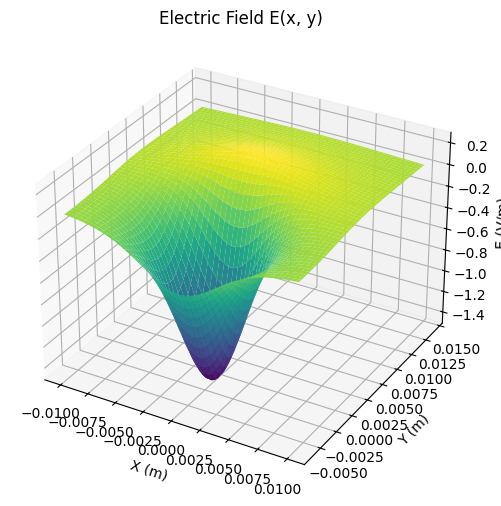

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns
R_coil = 0.0025  # Coil radius in meters
y_offset = 0.004  # Y-offset of the coil center in meters
z = 0.005  # Distance from coil plane to the XY plane in meters

# Define the di/dt value here based on results from Part A for max di/dt
di_dt_max = np.max(di_dt) # Placeholder value for the maximum di/dt (A/s)

# Coil discretization
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
dl = 2 * np.pi * R_coil / num_points  # Length of each coil segment
coil_positions = np.array([R_coil * np.cos(theta), R_coil * np.sin(theta), np.zeros(num_points)]).T

# Define the XY grid for the electric field calculation
grid_size = 100
x_range = np.linspace(-0.01, 0.01, grid_size)
y_range = np.linspace(-0.01 + y_offset, 0.01 + y_offset, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute the electric field at each point on the grid
E_field = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        r = np.array([X[i, j], Y[i, j], z])
        A = np.zeros(3)
        for k in range(num_points - 1):
            dl_vec = coil_positions[k+1] - coil_positions[k]
            r_prime = r - coil_positions[k]
            A += np.cross(dl_vec, r_prime) / np.linalg.norm(r_prime)**3
        A *= mu_0 * N * di_dt_max / (4 * np.pi)
        E_field[i, j] = -np.gradient(A, axis=0)[2]  # Assuming z component represents E_x

# Extract Ex component and calculate its spatial gradient dEx/dx
dEx_dx = np.gradient(E_field, axis=1)  # Gradient along x-axis

# Plot Ex field in 3D
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, E_field, cmap='viridis')
ax.set_title('Electric Field E(x, y)')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('E (V/m)')
plt.show()
